In [1]:
# Imports & Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns  

import datetime as dt

from pyfolio.plotting import (plot_perf_stats,
                            # show_perf_stats,
                              plot_rolling_beta,
                            # plot_rolling_returns,
                              plot_rolling_sharpe,
                              plot_drawdown_periods,
                              plot_drawdown_underwater)

from pyfolio.timeseries import perf_stats #, extract_interesting_date_ranges

In [ ]:
URL = r'C:\Users\.....................\daily_returns_spy.csv'
URL2 = r'C:\Users\.....................\daily_returns_strategies.csv'

daily_returns_spy = pd.read_csv(URL, index_col=0, parse_dates=True, sep=';')
daily_returns_strategies = pd.read_csv(URL2, index_col=0, parse_dates=True, sep=';')

In [3]:
# rename the columns
daily_returns_spy.columns = ['daily_returns_spy']
daily_returns_strategies.columns = ['daily_returns_strategies']

In [4]:
# SPY daily returns
benchmark_rets = daily_returns_spy.copy()

# rename the columns
benchmark_rets.columns = ['pct_change']

# fill the missing values with 0
benchmark_rets.fillna(0, inplace=True)

benchmark_rets.head()

,pct_change
Date,
2023-04-19,0.000000
2023-04-20,-0.005457
2023-04-21,0.000777
2023-04-24,0.001043
2023-04-25,-0.015874


In [5]:
returns = daily_returns_strategies.copy()

# rename the columns
returns.columns = ['returns']

returns.head()

,returns
Date,
2023-04-17,0.053781
2023-04-18,-0.000110
2023-04-19,-0.005066
2023-04-20,-0.000608
2023-04-21,0.005311


In [6]:
perf_stats(returns=returns['returns'],
           factor_returns=benchmark_rets['pct_change'])
#            positions=positions, 
#            transactions=transactions)

Annual return           0.669086
Cumulative returns      1.729790
Annual volatility       0.247954
Sharpe ratio            2.188878
Calmar ratio            3.235114
Stability               0.849764
Max drawdown           -0.206820
Omega ratio             1.686880
Sortino ratio           4.445098
Skew                    2.323230
Kurtosis               17.441220
Tail ratio              1.624090
Daily value at risk    -0.029086
Alpha                   0.719043
Beta                    0.059860
dtype: float64

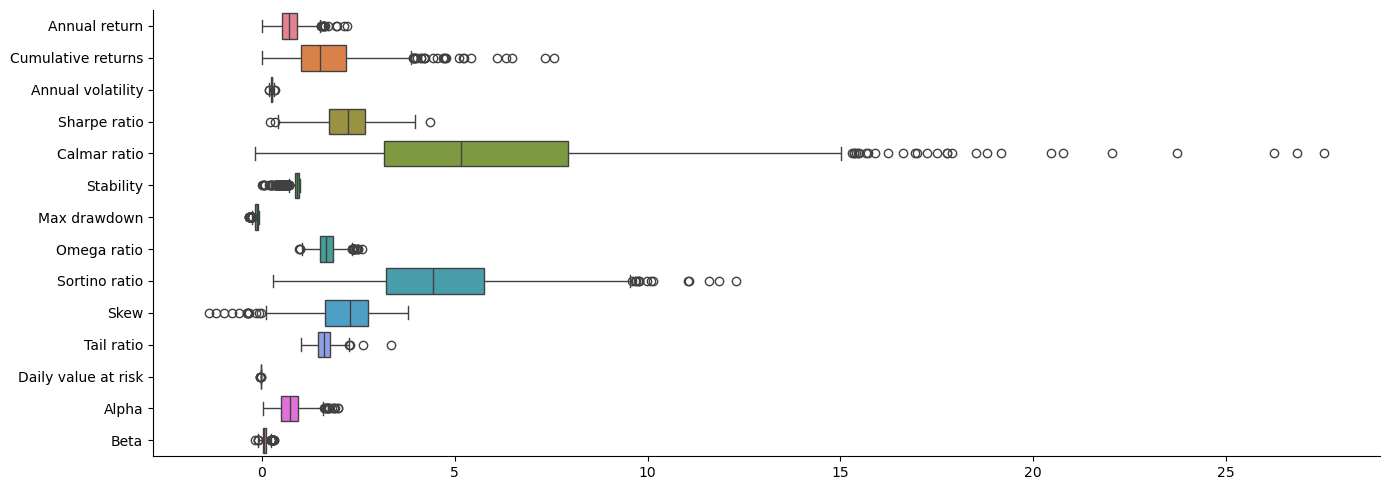

In [7]:
# Align the series
rets = returns['returns'].dropna()
bench = benchmark_rets['pct_change'].dropna()
common_idx = rets.index.intersection(bench.index)
rets = rets.loc[common_idx]
bench = bench.loc[common_idx]

fig, ax = plt.subplots(figsize=(14, 5))
plot_perf_stats(returns=rets, factor_returns=bench, ax=ax)
try:
    sns.despine()
except Exception as e:
    print("sns.despine() non ha avuto effetto:", e)
fig.tight_layout();

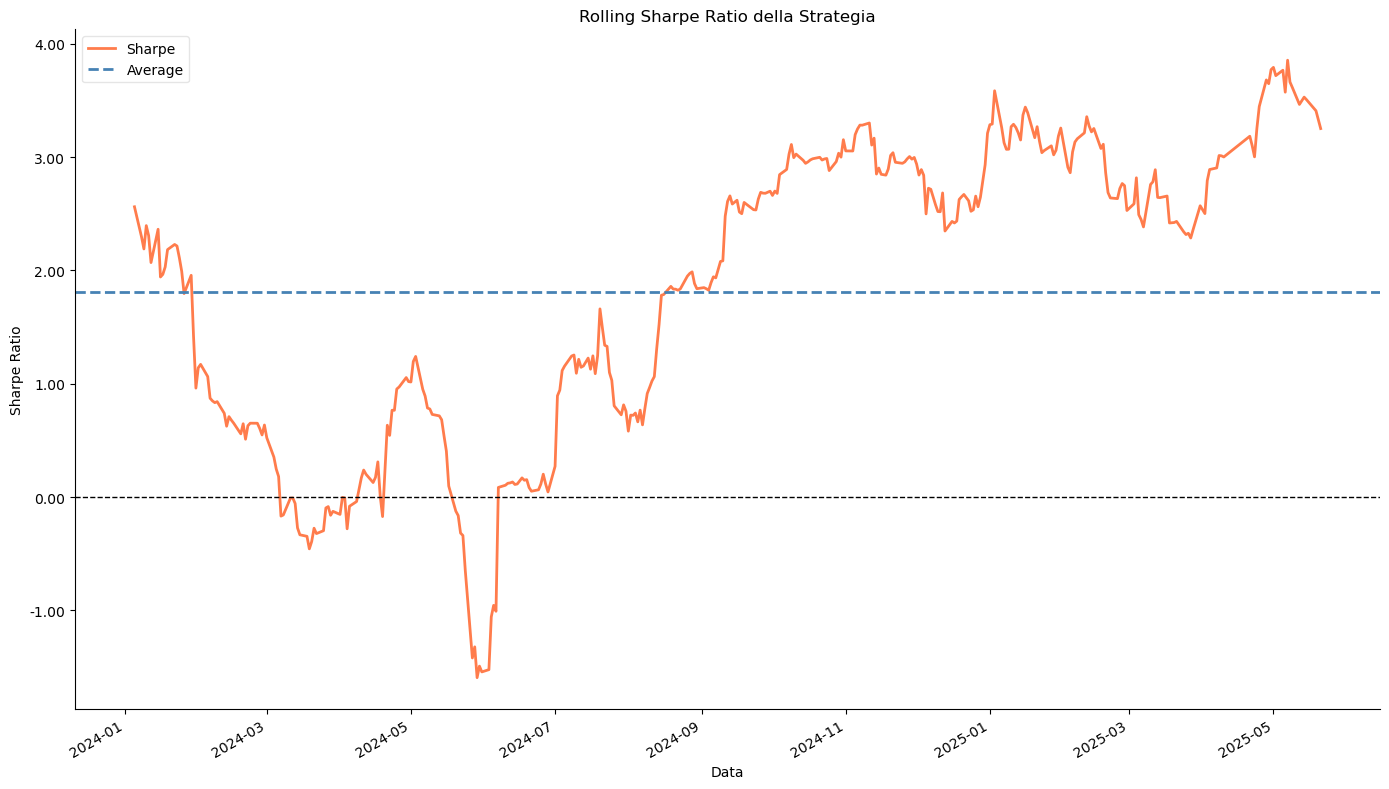

In [8]:
# Usa la Series dei ritorni, non il DataFrame
plot_rolling_sharpe(returns['returns'])
plt.gcf().set_size_inches(14, 8)
plt.title("Rolling Sharpe Ratio della Strategia")
plt.xlabel("Data")
plt.ylabel("Sharpe Ratio")
try:
    sns.despine()
except Exception as e:
    print("sns.despine() non ha avuto effetto:", e)
plt.tight_layout();

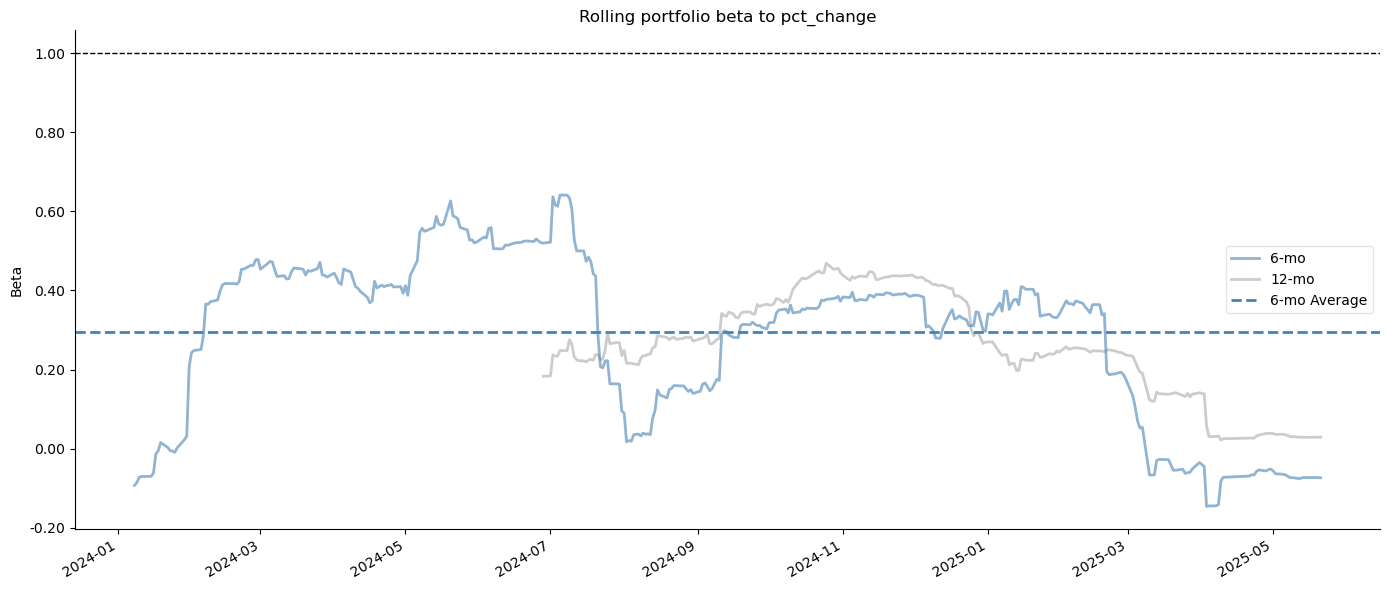

In [9]:
plot_rolling_beta(returns['returns'], factor_returns=benchmark_rets['pct_change'])
plt.gcf().set_size_inches(14, 6)
try:
    sns.despine()
except Exception as e:
    print("sns.despine() non ha avuto effetto:", e)
plt.tight_layout();

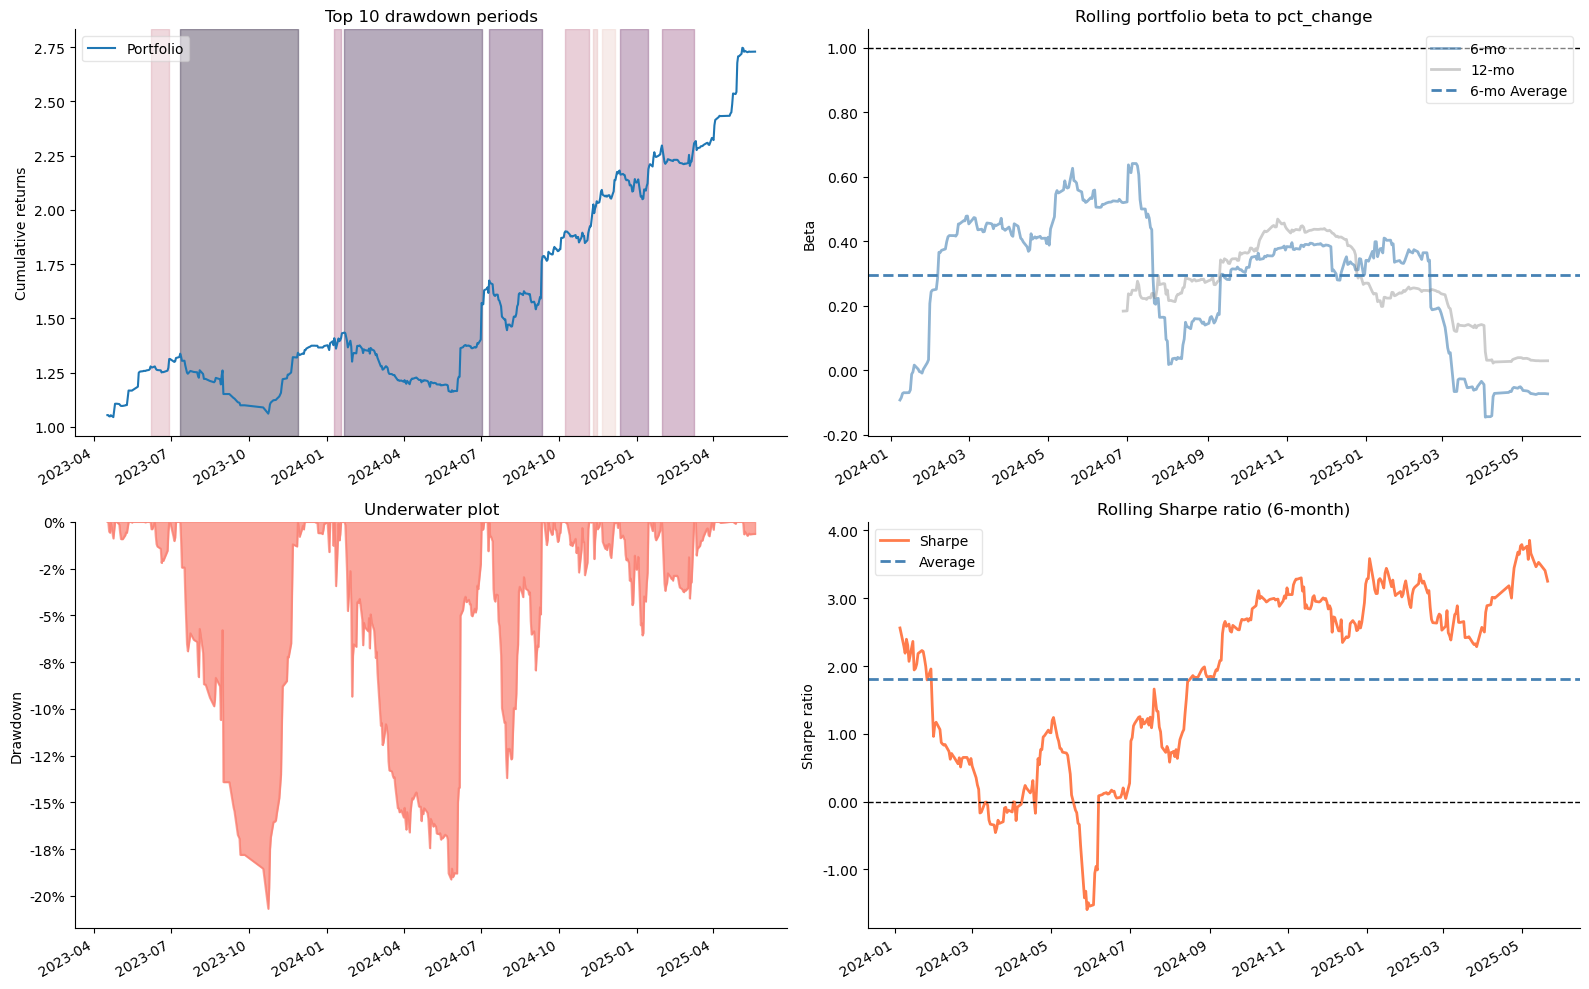

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = ax.flatten()

plot_drawdown_periods(returns=returns['returns'], ax=axes[0])
plot_rolling_beta(returns=returns['returns'], factor_returns=benchmark_rets['pct_change'], ax=axes[1])
plot_drawdown_underwater(returns=returns['returns'], ax=axes[2])
plot_rolling_sharpe(returns['returns'])
try:
    sns.despine()
except Exception as e:
    print("sns.despine() non ha avuto effetto:", e)
plt.tight_layout();